<a href="https://colab.research.google.com/github/WhiteWolf088/Regression-with-Neural-Network-in-TensorFlow/blob/main/Neural_Network_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Network in TensorFlow

There are *many definition for a regression problem but in our case, we're going to simplify it : predicting a numerical variables based on some other combination of variables,even shorter....predicting a number.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

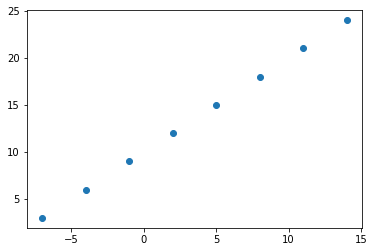

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create lables
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# Vizualize it
plt.scatter(x,y);

## Inputs and Output shapes

In [ ]:
# Create a tensor for our housing price prediction problem
house_info=tf.constant(["Bedroom","Bathroom","Garages"])
house_price=tf.constant([939700])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with TensorFlow

* 1.**Creating a model** - Define the input and output layer ,as well as hidden layers of a deep learning model

* 2.**Compiling a model** - Define the loss function(in other words,the function which tell our modelhow wrong it is)and the optimizer(tells our model how to improve the pattern its learning)and evaluation metrics(what we can use to interpret the performance of a model).

* 3.**Fitting a model** - letting the model try to find patterns between x and y (features and labels).

In [ ]:
x,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# 1.Create a model
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3.Fit the model 
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 600ms/step - loss: 19.2413 - mae: 19.2413
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 18.9600 - mae: 18.9600
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 18.6788 - mae: 18.6788
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 18.3975 - mae: 18.3975
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 18.1163 - mae: 18.1163


In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

array([[-16.519361]], dtype=float32)

## Improving Our Model

We can improve our model, by altering the steps we tool to create a model.

1. **Creating a model** - Here we might add more layers,increase the number of hidden units(all calles neurons) within each of the hidden layers, change the activation function of each layer
2. **Compiling a mode** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer)or on more data(give themodel more examples to learn from).

In [ ]:
model=tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 15.3627 - mae: 15.3627
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 14.8441 - mae: 14.8441
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 14.3407 - mae: 14.3407
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 13.8478 - mae: 13.8478
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3609 - mae: 13.3609
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8756 - mae: 12.8756
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3876 - mae: 12.3876
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8927 - mae: 11.8927
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3920 - mae: 11.3920
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8752 - mae: 10.8752
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
model.predict([17.0])

array([[31.203222]], dtype=float32)

In [ ]:
model=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(x,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 275ms/step - loss: 9.1929 - mae: 9.1929
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1479 - mae: 9.1479
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1029 - mae: 9.1029
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0579 - mae: 9.0579
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0129 - mae: 9.0129
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9679 - mae: 8.9679
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9229 - mae: 8.9229
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8779 - mae: 8.8779
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8329 - mae: 8.8329
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7879 - mae: 8.7879
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 8.74

In [ ]:
model.predict([17.0])

array([[31.336485]], dtype=float32)

Evaluating a Model 

In practice a typical workflow you'll go through when building neural networks is : 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation ... there are 3 word you should memorize:
"Visualize,Visualize,Visualize"

Its a good idea to visualize:
* The data - what data are we working with?what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while its learns?
* The prediction of the model - how do the prediction of the model line up against the ground truth(the original labels)?

In [ ]:
#Create a big data 
x=tf.range(-100,100,2)
x

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98], dtype=int32)>

In [ ]:
y=x+10

In [ ]:
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
       -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40,
       -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14,
       -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,
        14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,
        40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,
        66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,
        92,  94,  96,  98, 100, 102, 104, 106, 108], dtype=int32)>

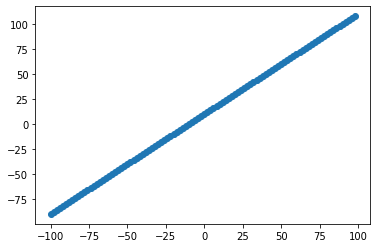

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

### The 3 Sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what ioy has learned,this set is typically 10-15% of the total data available.

In [ ]:
x_train=x[:80]
x_test=x[80:]

y_train=y[:80]
y_test=y[80:]

len(x_train),len(x_test),len(y_train),len(y_test)

(80, 20, 80, 20)

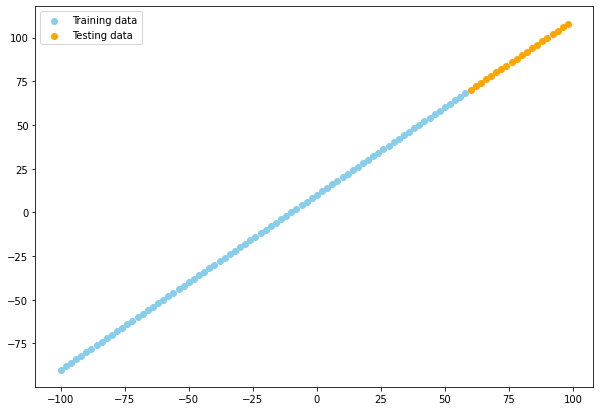

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="skyblue",label="Training data")
plt.scatter(x_test,y_test,c="orange",label="Testing data")
plt.legend();

In [ ]:
model=tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1],name="input_layer_1"),
  tf.keras.layers.Dense(10,input_shape=[1],name="input_layer_2"),
  tf.keras.layers.Dense(1,name="output_layer")
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer_1 (Dense)        (None, 10)                20        
_________________________________________________________________
input_layer_2 (Dense)        (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total param(parameters) - Total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**

In [ ]:
model.fit(x_train,y_train,epochs=100,verbose=0)

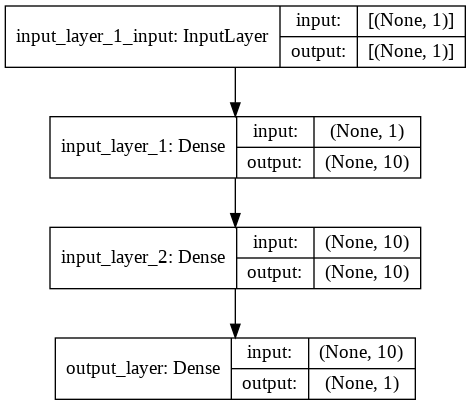

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Vizualizing our model predictions 

To visualize predictions, it's a good idea to plot them against the ground truth labels.Often you'll see this form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[ 73.01837 ],
       [ 75.11727 ],
       [ 77.21617 ],
       [ 79.31507 ],
       [ 81.41398 ],
       [ 83.512886],
       [ 85.611786],
       [ 87.71069 ],
       [ 89.80959 ],
       [ 91.908485],
       [ 94.0074  ],
       [ 96.1063  ],
       [ 98.2052  ],
       [100.30411 ],
       [102.403   ],
       [104.50191 ],
       [106.60081 ],
       [108.699715],
       [110.798615],
       [112.89753 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,
        96,  98, 100, 102, 104, 106, 108], dtype=int32)>

In [ ]:
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();

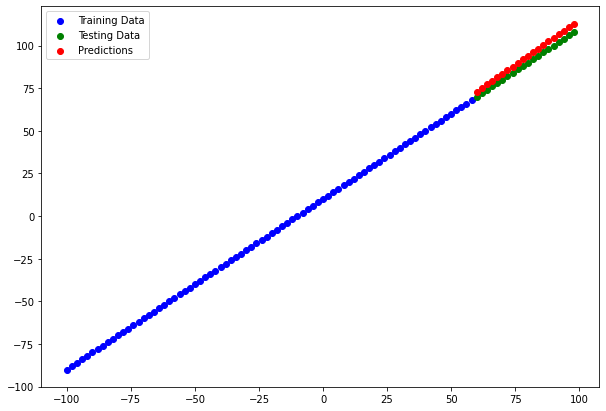

In [ ]:
plot_prediction(train_data=x_train,
                train_labels=y_train,
                test_data=x_test,
                test_labels=y_test,
                predictions=y_pred)

In [ ]:
model.predict([112])

array([[127.589836]], dtype=float32)

###Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean sruare error, "square the average error"


In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 151ms/step - loss: 3.9579 - mae: 3.9579


[3.957944869995117, 3.957944869995117]

In [ ]:
tf.keras.losses.MAE(y_test,tf.constant(y_pred))

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([16.385303, 14.817911, 13.470297, 12.342464, 11.434408, 10.746134,
       10.277643, 10.028931, 10.      , 10.190848, 10.602221, 11.24252 ,
       12.1026  , 13.182465, 14.4821  , 16.001526, 17.740726, 19.699715,
       21.798615, 23.89753 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[ 73.01837 ],
       [ 75.11727 ],
       [ 77.21617 ],
       [ 79.31507 ],
       [ 81.41398 ],
       [ 83.512886],
       [ 85.611786],
       [ 87.71069 ],
       [ 89.80959 ],
       [ 91.908485],
       [ 94.0074  ],
       [ 96.1063  ],
       [ 98.2052  ],
       [100.30411 ],
       [102.403   ],
       [104.50191 ],
       [106.60081 ],
       [108.699715],
       [110.798615],
       [112.89753 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,
        96,  98, 100, 102, 104, 106, 108], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 73.01837 ,  75.11727 ,  77.21617 ,  79.31507 ,  81.41398 ,
        83.512886,  85.611786,  87.71069 ,  89.80959 ,  91.908485,
        94.0074  ,  96.1063  ,  98.2052  , 100.30411 , 102.403   ,
       104.50191 , 106.60081 , 108.699715, 110.798615, 112.89753 ],
      dtype=float32)>

In [ ]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.9579444>

In [ ]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=15.990567>

In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -
> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your modal larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - Same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers,trained for 100 epochs.```````````````````````
3. `model_3` - 2 layers,trained for 500 epochs.

In [ ]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mse"])
model_1.fit(x_train,y_train,epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 2ms/step - loss: 748.5167 - mse: 748.5167
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 314.3088 - mse: 314.3088
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 115.0752 - mse: 115.0752
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 90.4366 - mse: 90.4366
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 135.5509 - mse: 135.5509
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 158.8615 - mse: 158.8615
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 129.1371 - mse: 129.1371
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 91.5364 - mse: 91.5364
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 71.7937 - mse: 71.7937
Epoch 10/500
3/3 [==============================] - 0s 3ms/step - loss: 76.4053 - mse: 76.4053
Epoch 11/500
3/3 [==============================] - 0s 3ms/

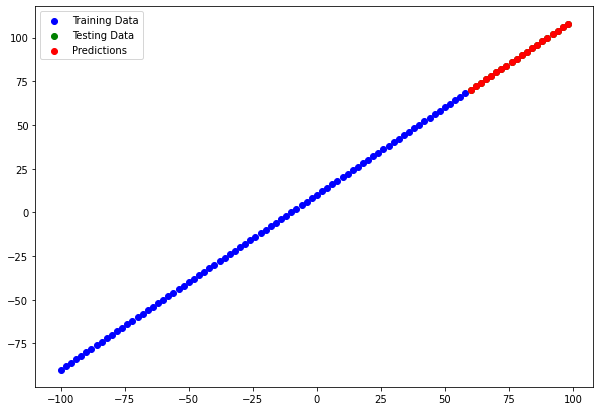

In [ ]:
y_pred_1=model_1.predict(x_test)
tf.squeeze(x_test)
plot_prediction(predictions=y_pred_1)

In [ ]:
model_1.predict([-95])

array([[-85.00001]], dtype=float32)

In [ ]:
x_train,y_train

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
         -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
         -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
         -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
         -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
          10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
          32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
          54,   56,   58], dtype=int32)>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
        -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40,
        -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14,
        -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,
         14,  16,  18,  20,  22,  24,  26,  28,  30,  32

### Comparing the results of our experiments
we've run few experiments,lets compare the results

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goal should be to minimize the time between your experiments you do,the more things you'll figure out which don't work and in turn, get closure to figuring out what does work. Remember the machine learning practioner's motto: "experiment,experiment,experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiment.

And when doing so, it can be tendious if you're running lot of experiments.

Luckily,there are tools to help us!

**Resource:** As you build more models,you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights and Biases - a tool for tracking all kinds of machine learning experiments(plugs straight into TensorBoard)

## Saving Our Models


Saving our models allows us to use them outside of google Colab( or wherever they were trained) such as in a web application or mobile applications.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
model_1.save("Best_model_SavedModel_format")

INFO:tensorflow:Assets written to: Best_model_SavedModel_format/assets


In [ ]:
model_1.save("Best_model_HDF5_format.h5")

# loading in saved model

In [ ]:
loaded_SavedModel_format=tf.keras.models.load_model("/content/Best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1_preds=model_1.predict(x_test)
loaded_SavedModel_format.preds=loaded_SavedModel_format.predict(x_test)
model_1_preds==loaded_SavedModel_format.preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_h5_model=tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_model.preds=loaded_h5_model.predict(x_test)
model_1_preds=model_1.predict(x_test)
loaded_h5_model.preds==model_1_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (See 2nd code cell below).


In [ ]:
from google.colab import files
files.download("/content/Best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/Best_model_HDF5_format.h5 /content/drive/MyDrive/Trained model

cp: target 'model' is not a directory


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DatFrame so it's all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create x & y values (features and labels)
x=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]


In [ ]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
len(x),len(x_train),len(x_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_1 above)
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=["mae"])

insurance_model.fit(x_train,y_train,epochs=500)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13279.1016 - mae: 13279.1016
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12998.5508 - mae: 12998.5508
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12359.9570 - mae: 12359.9570
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 11267.7432 - mae: 11267.7432
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 9902.3105 - mae: 9902.3105
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 8626.2051 - mae: 8626.2051
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7781.4487 - mae: 7781.4487
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7492.3174 - mae: 7492.3174
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7429.4502 - mae: 7429.4502
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7404.6792 - mae: 7

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3174.4651 - mae: 3174.4651


[3174.465087890625, 3174.465087890625]

Right now it looks like our model isn't performing too well.... let's try and improve it

In [ ]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3174.4651 - mae: 3174.4651


[3174.465087890625, 3174.465087890625]

In [ ]:
tf.random.set_seed(42)
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)

insurance_model_3=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history=insurance_model_3.fit(x_train,y_train,epochs=200,verbose=1)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(x_test,y_test),insurance_model_2.evaluate(x_test,y_test),insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


([3174.465087890625, 3174.465087890625],
 [4924.34765625, 4924.34765625],
 [3491.296142578125, 3491.296142578125])

Text(0.5, 0, 'epochs')

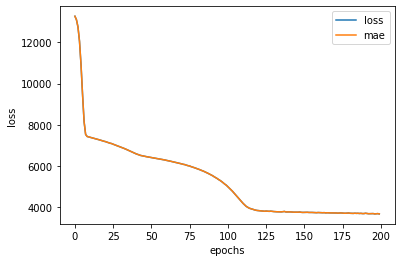

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**->**   **Question:**  How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people asked this question before.... so TensorFlow has a solution ! It's called the [ ***EarlyStopping Callback*** ] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

### Prepocessing data (normalization and standardization) 

In terms of scaling values,neural networks tends to prefer normalization .

If yoy're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


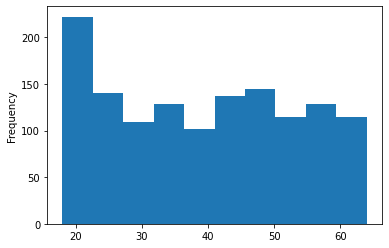

In [ ]:
x["age"].plot(kind="hist")

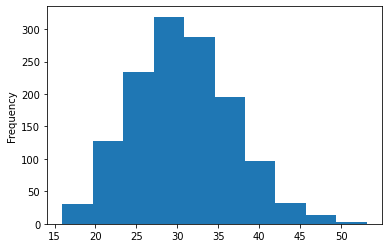

In [ ]:
x["bmi"].plot(kind="hist")